# Evaluation 

### Imports

In [3]:
import json
import glob
import pandas as pd
import os
import matplotlib.pyplot as plt

## Evaluating the regression datasets

In [12]:
files = glob.glob("results/*.json") # all the json files in the directory should be read in

for file in files:
    with open(file, "r") as f:
        data = json.load(f) 
    
    records = []
    for run in data:
        params = { # get all the parameters
            "window_size": run["window_size"],
            "learning_rate": run["learning_rate"],
            "hidden_layer_size": run["hidden_layer_size"]
        }

        train = run["metrics"]["train"]
        test = run["metrics"]["test"]

        records.append({
            **params,
            "Train_RMSE_mean": train["RMSE"]["mean"], "Train_RMSE_std": train["RMSE"]["std"], "Train_MAE_mean": train["MAE"]["mean"],"Train_MAE_std": train["MAE"]["std"],
            "Test_RMSE_mean": test["RMSE"]["mean"], "Test_RMSE_std": test["RMSE"]["std"], "Test_MAE_mean": test["MAE"]["mean"], "Test_MAE_std": test["MAE"]["std"],
        })

    df = pd.DataFrame(records)
    # the mae is the most important - tie breaks with rmse
    df = df.sort_values(by="Test_MAE_mean", ascending=True).reset_index(drop=True)

    # for display purposes reorder the order
    column_order = ["window_size", "learning_rate", "hidden_layer_size", "Train_MAE_mean", "Train_MAE_std", "Train_RMSE_mean", "Train_RMSE_std", "Test_MAE_mean", "Test_MAE_std", "Test_RMSE_mean", "Test_RMSE_std" ]
    df = df[column_order]

    # save to a latex table 
    base_name = os.path.splitext(os.path.basename(file))[0]

    latex_table = df.to_latex(
        index=False, float_format="%.4f",
        caption=f"Train and Test performance for {base_name} dataset",
        label=f"tab:{base_name}"
    )

    with open(f"results/{base_name}_table.tex", "w") as f:
        f.write(latex_table)

In [5]:
# elman, jordan and multi outputs
files = glob.glob("results/Weather/*.json")

for file in files:
    with open(file, "r") as f:
        data = json.load(f) 
    
    records = []
    for run in data:
        params = { # all the hyperparameters
            "window_size": run["window_size"],
            "learning_rate": run["learning_rate"],
            "hidden_layer_size": run["hidden_layer_size"]
        }
        train = run["metrics"]["train"]
        test = run["metrics"]["test"]

        records.append({
            **params,
            "Train_Accuracy_mean": train["Accuracy"]["mean"], "Train_Accuracy_std": train["Accuracy"]["std"], "Train_F1_mean": train["F1"]["mean"],"Train_F1_std": train["F1"]["std"],
            "Test_Accuracy_mean": test["Accuracy"]["mean"],  "Test_Accuracy_std": test["Accuracy"]["std"], "Test_F1_mean": test["F1"]["mean"], "Test_F1_std": test["F1"]["std"],
        })

    df = pd.DataFrame(records)
    # f1 is the best indication of how well peformed
    df = df.sort_values(by="Test_F1_mean", ascending=False).reset_index(drop=True)


    # reorder for output
    column_order = ["window_size", "learning_rate", "hidden_layer_size", "Train_F1_mean", "Train_F1_std","Train_Accuracy_mean", "Train_Accuracy_std","Test_F1_mean", "Test_F1_std","Test_Accuracy_mean", "Test_Accuracy_std"]
    df = df[column_order]

    # latex table for overleaf
    base_name = os.path.splitext(os.path.basename(file))[0]

    latex_table = df.to_latex(
        index=False, float_format="%.4f",
        caption=f"Train and Test performance for weather dataset",
        label=f"tab:{base_name}"
    )

    with open(f"results/{base_name}_table.tex", "w") as f:
        f.write(latex_table)

## Box plots of the best combination of hyperparameters for each dataset

#### Population

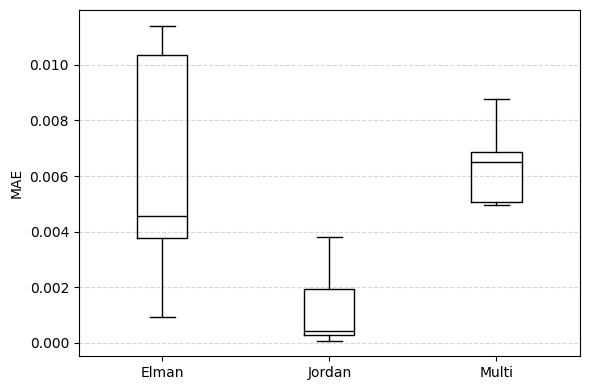

In [6]:
# best elman 
elman_each_fold_mae = [
            0.011404431425035,
            0.000935675750952214,
            0.004567905329167843,
            0.010354350320994854,
            0.0037679115775972605
          ]

# best jordan
jordan_each_fold_mae =[
            0.003817963181063533,
            0.00027747335843741894,
            0.00042682274943217635,
            8.292259008157998e-05,
            0.0019261866109445691
          ]

# best multi
multi_each_fold_mae = [
            0.008785032667219639,
            0.0068558622151613235,
            0.0065049366094172,
            0.004962465725839138,
            0.005058106500655413
          ]


# Combine data
data = [elman_each_fold_mae, jordan_each_fold_mae, multi_each_fold_mae]
labels = ['Elman', 'Jordan', 'Multi']

plt.figure(figsize=(6,4))
plt.boxplot(data, tick_labels=labels, medianprops=dict(color='black'))

plt.ylabel("MAE")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### Stocks

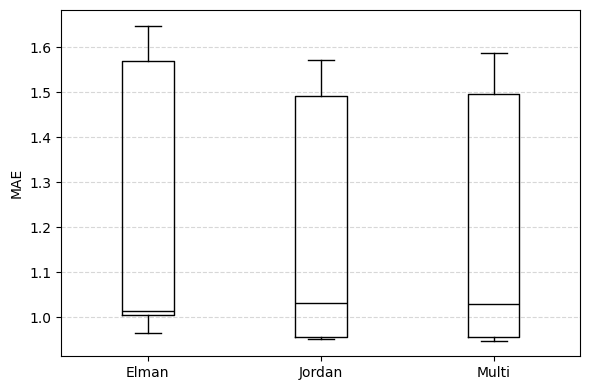

In [14]:
# best elman 
elman_each_fold_mae = [
            1.0064704418182373,
            1.568877935409546,
            1.647515892982483,
            1.0139638185501099,
            0.96555495262146
          ]

# best jordan
jordan_each_fold_mae = [
            0.9531543254852295,
            1.490962028503418,
            1.5704188346862793,
            1.0325425863265991,
            0.9556627869606018
          ]
# best multi
multi_each_fold_mae =  [
            0.9573966264724731,
            1.4952131509780884,
            1.586083173751831,
            1.0296989679336548,
            0.9487652778625488
          ]

data = [elman_each_fold_mae, jordan_each_fold_mae, multi_each_fold_mae]
labels = ['Elman', 'Jordan', 'Multi']

plt.figure(figsize=(6,4))
plt.boxplot(data, tick_labels=labels, medianprops=dict(color='black'))

plt.ylabel("MAE")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### Property

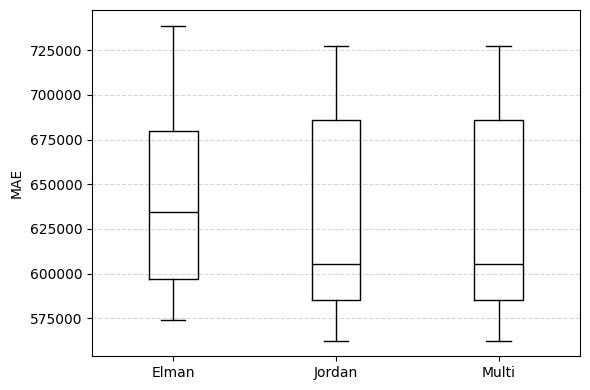

In [13]:
# best elman 
elman_each_fold_mae = [
            574064.8125,
            596827.75,
            634288.8125,
            679871.375,
            738700.75
          ]
# best jordan
jordan_each_fold_mae =  [
            562479.5,
            585229.6875,
            605140.9375,
            685828.9375,
            727094.4375
          ]
# best multi
multi_each_fold_mae = [
            562481.9375,
            585237.0625,
            605138.875,
            685832.6875,
            727106.625
          ]

data = [elman_each_fold_mae, jordan_each_fold_mae, multi_each_fold_mae]
labels = ['Elman', 'Jordan', 'Multi']

plt.figure(figsize=(6,4))
plt.boxplot(data, tick_labels=labels, medianprops=dict(color='black'))

plt.ylabel("MAE")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### Fires

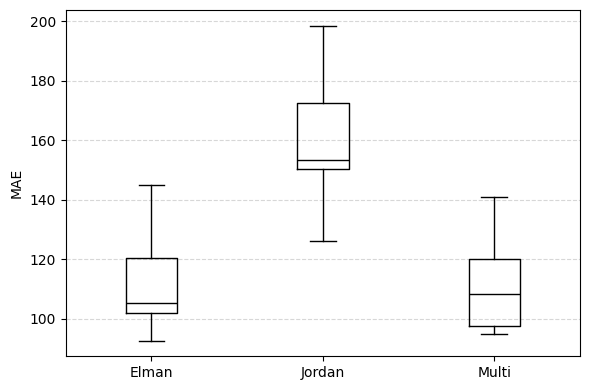

In [9]:
# best elman 
elman_each_fold_mae = [
            145.03395080566406,
            92.67623138427734,
            105.13744354248047,
            101.98622131347656,
            120.44981384277344
          ]
# best jordan
jordan_each_fold_mae = [
            198.57203674316406,
            126.08219146728516,
            153.4817657470703,
            150.33267211914062,
            172.6698455810547
          ]
# best multi
multi_each_fold_mae = [
            140.95912170410156,
            94.90888977050781,
            108.49932098388672,
            97.57845306396484,
            120.06298828125
          ]

data = [elman_each_fold_mae, jordan_each_fold_mae, multi_each_fold_mae]
labels = ['Elman', 'Jordan', 'Multi']

plt.figure(figsize=(6,4))
plt.boxplot(data, tick_labels=labels, medianprops=dict(color='black'))

plt.ylabel("MAE")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### Weather

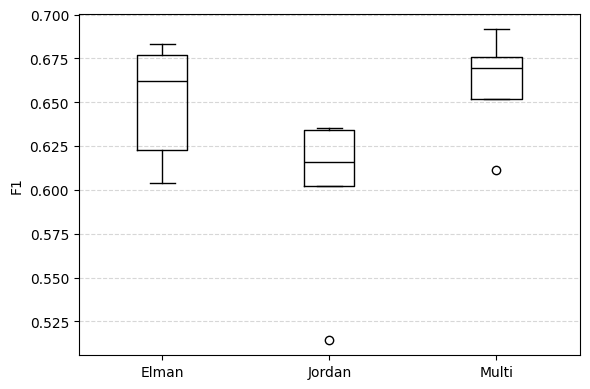

In [10]:
# best elman 
elman_each_fold_mae = [
            0.6770214447004822,
            0.6621811352405959,
            0.6831315328227905,
            0.6040941523045775,
            0.6225519546740396
          ]
# best jordan
jordan_each_fold_mae =  [
            0.6161049489421454,
            0.6350446258126667,
            0.6019588100916785,
            0.5145222256423941,
            0.6343027638776716
          ]
# best multi
multi_each_fold_mae = [
            0.6917646557310515,
            0.6695227843414047,
            0.6759384008927286,
            0.6112645465281198,
            0.6519659382726144
          ]

data = [elman_each_fold_mae, jordan_each_fold_mae, multi_each_fold_mae]
labels = ['Elman', 'Jordan', 'Multi']

plt.figure(figsize=(6,4))
plt.boxplot(data, tick_labels=labels, medianprops=dict(color='black'))

plt.ylabel("F1")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Friedman test results:
Chi-square statistic: 1600.0000
p-value: 0.0000
Degrees of freedom: 2
There are significant differences among the models.
\begin{table}[htbp]
\caption{Pairwise Comparison of Architectures}
\begin{center}
\begin{tabular}{c|c c c c c c}
Model A & Model B & z-value & p-value(unadj.) & p-value(adj.) & Null Hypoth. & Better Model \\
\hline
Jordan & Elman & -8.94427 & 0.00000 & 0.00000 & Rejected & Jordan \\
Jordan & Multi & -4.47214 & 0.00001 & 0.00002 & Rejected & Jordan \\
Elman & Multi & 4.47214 & 0.00001 & 0.00002 & Rejected & Multi \\
\end{tabular}
\label{tab_pairwise}
\end{center}
\end{table}


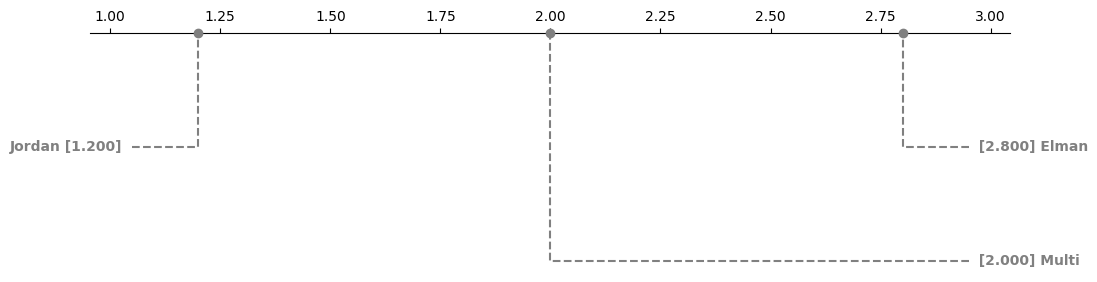

In [22]:
#Not my code: https://github.com/KianAnd19/rnn-time-series/tree/main

from import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from itertools import combinations
from scipy import stats
import scikit_posthocs as sp
import pandas as pd


# https://github.com/yesteryearer/Automated-Analysis-of-Metaheuristics
def plot_critical_difference_diagram(ranks, sig_matrix):
    fig, ax = plt.subplots(figsize=(11.5, 5))
    
    sp.critical_difference_diagram(
        ranks, 
        sig_matrix, 
        ax=ax, 
        label_fmt_left='{label} [{rank:.3f}]  ',
        label_fmt_right='  [{rank:.3f}] {label}',
        text_h_margin=0.15,
        label_props={ 'fontweight': 'bold', 'fontsize': 10},
        crossbar_props={'color': None, 'marker': 'o', 'linewidth': 1.5},
        elbow_props={'color': 'gray', 'linestyle': '--'},
    )

    plt.subplots_adjust(left=0.1, right=0.9, top=0.8, bottom=0.3)

def friedman_test(data):
    k = data.shape[1]  # number of models
    n = data.shape[0]  # number of datasets
    
    # Convert data to ranks
    ranks = np.zeros_like(data)
    for i in range(n):
        ranks[i] = stats.rankdata(data[i])
    
    # Calculate R_j (sum of ranks for each model)
    R_j = np.sum(ranks, axis=0)
    
    # Calculate Friedman statistic
    chi2 = (12 * n) / (k * (k + 1)) * (np.sum(R_j ** 2) - (k * (k + 1) ** 2) / 4)
    
    # Degrees of freedom
    df = k - 1
    
    # Calculate p-value
    p_value = stats.chi2.sf(chi2, df)
    
    return chi2, p_value, df, R_j

def compute_CD(n_datasets, n_models, alpha=0.05):
    q = stats.studentized_range.ppf(q=1-alpha, k=n_models, df=np.inf)
    CD = q * np.sqrt((n_models * (n_models + 1)) / (6 * n_datasets))
    return CD

def pairwise_comparison(R_j, n_datasets, n_models):
    se = np.sqrt((n_models * (n_models + 1)) / (6 * n_datasets))
    
    comparisons = []
    for (i, Ri), (j, Rj) in combinations(enumerate(R_j), 2):
        z = (Ri - Rj) / (np.sqrt(2) * se)
        p_unadj = 2 * (1 - stats.norm.cdf(abs(z)))
        comparisons.append((i, j, z, p_unadj))
    
    # Manual Bonferroni correction
    n_comparisons = len(comparisons)
    p_adj = [min(p * n_comparisons, 1.0) for _, _, _, p in comparisons]
    
    return [(c[0], c[1], c[2], c[3], p) for c, p in zip(comparisons, p_adj)]


# Load data
data = []
with open('final_results_assignment3.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip().split(' ')
        line = [float(x) for x in line]
        data.append(line)
data = np.array(data)

# Perform Friedman test
chi2, p_value, df, R_j = friedman_test(data)

print(f"Friedman test results:")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Degrees of freedom: {df}")

if p_value < 0.05:
    print("There are significant differences among the models.")
else:
    print("There are no significant differences among the models.")

# Prepare data for critical difference plot
n_datasets, n_models = data.shape
model_names = ['Jordan', 'Elman', 'Multi']  # Replace with your actual model names
average_ranks = R_j / n_datasets

# Compute Critical Difference
cd = compute_CD(n_datasets, n_models)

comparisons = pairwise_comparison(R_j, n_datasets, n_models)

# Create a symmetric matrix for p-values (significance matrix)
sig_matrix = np.ones((n_models, n_models))  # Initialize with 1s (no significance)
for i, j, z, p_unadj, p_adj in comparisons:
    sig_matrix[i, j] = p_adj
    sig_matrix[j, i] = p_adj  # Symmetry

# Convert significance matrix to DataFrame
sig_matrix_df = pd.DataFrame(sig_matrix, columns=model_names, index=model_names)

# Plot critical difference diagram using scikit_posthocs
plot_critical_difference_diagram(dict(zip(model_names, average_ranks)), sig_matrix_df)

# Generate LaTeX table
latex_table = r"""\begin{table}[htbp]
\caption{Pairwise Comparison of Architectures}
\begin{center}
\begin{tabular}{c|c c c c c c}
Model A & Model B & z-value & p-value(unadj.) & p-value(adj.) & Null Hypoth. & Better Model \\
\hline
"""

for i, j, z, p_unadj, p_adj in comparisons:
    null_hypoth = "Retained" if p_adj >= 0.05 else "Rejected"
    better_model = model_names[i] if R_j[i] < R_j[j] else model_names[j]
    latex_table += f"{model_names[i]} & {model_names[j]} & {z:.5f} & {p_unadj:.5f} & {p_adj:.5f} & {null_hypoth} & {better_model} \\\\\n"

latex_table += r"""\end{tabular}
\label{tab_pairwise}
\end{center}
\end{table}"""

print(latex_table)